In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data-27.csv to data-27.csv


In [3]:
df=pd.read_csv('data-27.csv')

In [12]:
print(df.head())
df.info()
df.describe()
df.isnull().sum()

              datetime      open      high       low     close        volume  \
0  2018-01-01 00:00:00  13715.65  13818.55  12750.00  13135.00   6970.441076   
1  2018-01-02 00:00:00  13135.00  14750.00  12890.02  14580.00  16359.347340   
2  2018-01-03 00:00:00  14576.87  15473.49  14150.00  14749.97  19457.238601   
3  2018-01-04 00:00:00  14710.00  15280.00  13918.04  14811.00  18783.876561   
4  2018-01-05 00:00:00  14805.01  17118.13  14600.00  16579.00  22383.657333   

   Unnamed: 0.1  Unnamed: 0  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      2924 non-null   object 
 1   open          2924 non-null   float64
 2   high          2924 non-null   float64
 3   low          

,0
datetime,0
open,0
high,0
low,0
close,0
volume,0
Unnamed: 0.1,731
Unnamed: 0,731


In [19]:
for row in df['Unnamed: 0.1'] :
  if row :
    print(row)
    break

nan


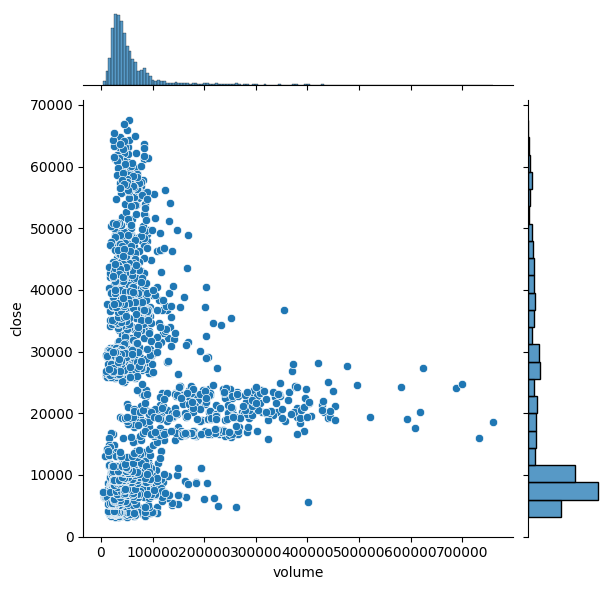

In [20]:
sns.jointplot(x='volume',y='close',kind='scatter',data=df)

In [42]:
#df['date']=str(df['datetime']).split(' ')[0]
#sns.jointplot(x='datetime',y='close',kind='scatter',data=df)
#sns.jointplot(x='datetime',y='volume',kind='scatter',data=df)


<Axes: xlabel='open', ylabel='close'>

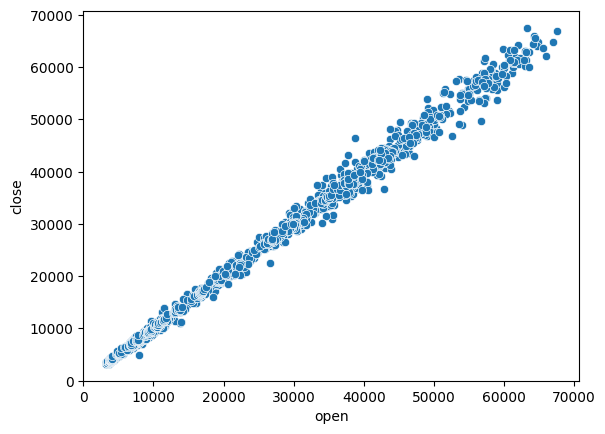

In [47]:
sns.scatterplot(x='open',y='close',data=df)



In [4]:
df['datetime']=[i for i in range(1,2925)] #converting to day number
df.corr()

,datetime,open,high,low,close,volume,Unnamed: 0.1,Unnamed: 0
datetime,1.000000,0.670514,0.666642,0.676882,0.671101,0.387327,1.000000,1.000000
open,0.670514,1.000000,0.999279,0.998705,0.998400,0.115836,0.620319,0.620319
high,0.666642,0.999279,1.000000,0.998462,0.999260,0.120718,0.615102,0.615102
low,0.676882,0.998705,0.998462,1.000000,0.999112,0.109057,0.628693,0.628693
close,0.671101,0.998400,0.999260,0.999112,1.000000,0.115041,0.620784,0.620784
volume,0.387327,0.115836,0.120718,0.109057,0.115041,1.000000,0.352140,0.352140
Unnamed: 0.1,1.000000,0.620319,0.615102,0.628693,0.620784,0.352140,1.000000,1.000000
Unnamed: 0,1.000000,0.620319,0.615102,0.628693,0.620784,0.352140,1.000000,1.000000


<Axes: xlabel='datetime', ylabel='close'>

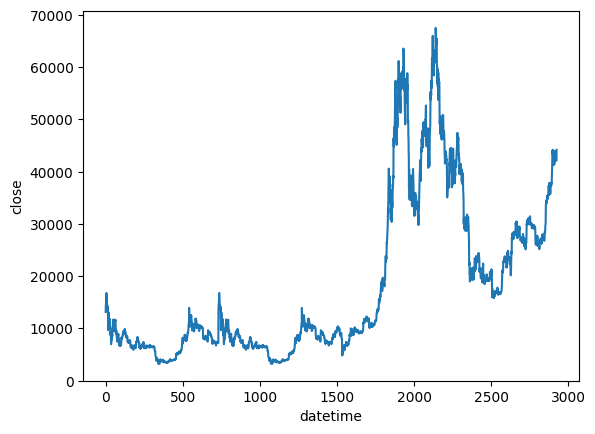

In [45]:
sns.lineplot(x='datetime',y='close',data=df)

<Axes: xlabel='datetime', ylabel='open'>

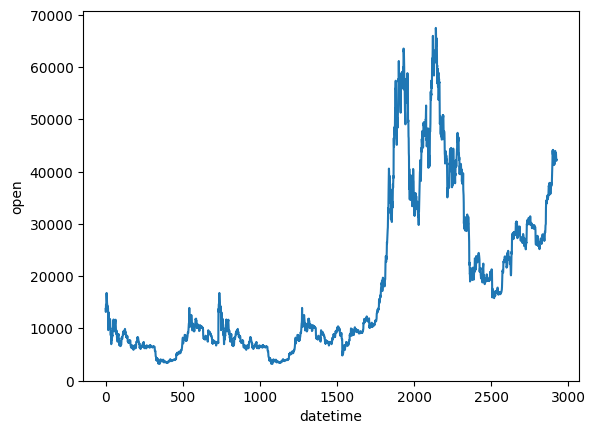

In [46]:
sns.lineplot(x='datetime',y='open',data=df)

In [ ]:
'''
df['SMA']=''
for i in range(0,2924):
  if i <4:
    sma=df['close'][i]
    df.loc[i, 'SMA']=sma
  else:
    sma=(df['close'][i-4]+df['close'][i-3]+df['close'][i-2]+df['close'][i-1]+df['close'])//5. # 5-day SMA
    df.loc[i, 'SMA']=sma
print(df.head())'''

In [5]:
for i in range(len(df)):
    if i < 4:
        df.loc[i, 'SMA'] = df.loc[i, 'close']
    else:
        sma = (
            df.loc[i - 4, 'close'] +
            df.loc[i - 3, 'close'] +
            df.loc[i - 2, 'close'] +
            df.loc[i - 1, 'close'] +
            df.loc[i, 'close']
        ) // 5
        df.loc[i, 'SMA'] = sma

In [19]:
#x = 1 / 210
#arr = np.array([x * i for i in range(1, 21)]) # to generate equal spaced , strictly increasing 20 values , for WMA

alpha = 2 / 21
weights = np.array([(1 - alpha) ** i for i in range(20)][::-1])  # reverse for oldest to newest
weights = alpha * weights

# Normalize to make sum = 1
weights = weights / weights.sum()

for i in range(len(df)):
    if i < 19:
        df.loc[i, 'EMA_20'] = df.loc[i, 'close']
    else:
        w_sum=0
        idx=0
        for j in range(i-19,i+1):
          w_sum+=df.loc[j, 'close']*weights[idx]
          idx+=1
        df.loc[i, 'EMA_20']= w_sum


In [15]:
#x = 1 / 1275
#arr = np.array([x * i for i in range(1, 51)]) # to generate equal spaced , strictly increasing 50 values, for WMA
alpha = 2 / 51
weights = np.array([(1 - alpha) ** i for i in range(50)][::-1])
weights = alpha * weights
weights = weights / weights.sum()


for i in range(len(df)):
    if i < 49:
        df.loc[i, 'EMA_50'] = df.loc[i, 'close']
    else:
        w_sum=0
        idx=0
        for j in range(i-49,i+1):
          w_sum+=df.loc[j, 'close']*weights[idx]
          idx+=1
        df.loc[i, 'EMA_50']= w_sum


In [20]:
df.tail()

,datetime,open,high,low,close,volume,Unnamed: 0.1,Unnamed: 0,SMA,EMA_20,EMA_50,std_dev
2919,2920,43428.86,43787.57,42241.79,42563.76,35150.52485,2188.0,2188.0,43013.0,42975.830399,41526.070477,5781.406559
2920,2921,42563.76,43111.00,41300.00,42066.95,42597.18912,2189.0,2189.0,42828.0,42864.772000,41580.206644,5828.524198
2921,2922,42066.94,42612.32,41520.30,42140.28,22906.57818,2190.0,2190.0,42541.0,42771.236016,41631.860521,5875.917638
2922,2923,42140.29,42899.00,41965.84,42283.58,23585.91603,2191.0,2191.0,42496.0,42740.119293,41689.040791,5923.186864
2923,2924,42283.58,44184.10,42180.77,44179.55,27174.29903,2192.0,2192.0,42646.0,42917.186686,41830.368418,5988.365777


In [22]:
df['std_dev'] = df['close'].rolling(180).std() # calculates std dev using SMA as mean,
# rolling automatically handles time_series data
# use pd.to_datetime function to handle dates

In [21]:
df.tail()

,datetime,open,high,low,close,volume,Unnamed: 0.1,Unnamed: 0,SMA,EMA_20,EMA_50,std_dev
2919,2920,43428.86,43787.57,42241.79,42563.76,35150.52485,2188.0,2188.0,43013.0,42975.830399,41526.070477,5781.406559
2920,2921,42563.76,43111.00,41300.00,42066.95,42597.18912,2189.0,2189.0,42828.0,42864.772000,41580.206644,5828.524198
2921,2922,42066.94,42612.32,41520.30,42140.28,22906.57818,2190.0,2190.0,42541.0,42771.236016,41631.860521,5875.917638
2922,2923,42140.29,42899.00,41965.84,42283.58,23585.91603,2191.0,2191.0,42496.0,42740.119293,41689.040791,5923.186864
2923,2924,42283.58,44184.10,42180.77,44179.55,27174.29903,2192.0,2192.0,42646.0,42917.186686,41830.368418,5988.365777


In [27]:
print(df.loc[i,'std_dev'].max(),i,df.loc[i,'close']) #most volatile price


5988.365777464563 2923 44179.55
